In [14]:
import pandas as pd
import numpy as np


In [19]:
df = pd.read_csv('data/measurements.csv')

In [20]:
df_2 = pd.read_excel('data/measurements2.xlsx')

In [21]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [22]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [23]:
df_2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [24]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols

    lst = ['distance', 'consume', 'temp_inside']
    for col in lst:
        df[col] = df[col].str.replace(',', '.').astype(float)
    return df

In [25]:
clean_df(df)
df


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [26]:
#Making sure exel and csv files contain the same data
df.merge(df_2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


In [27]:
df.isna().sum()
#One of the columns that have a lot of NaNs is "specials", that indicates either something special happened or not. I will check the unique values 
# to see if is possible to replace them to numbers

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [28]:
df['specials'].value_counts()
#This information is already in the columns "AC", "rain" and "sun", so I'll drop the "specials" column

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [29]:
df.drop('specials', axis=1, inplace=True)

In [30]:
df.isna().sum()
#Refil liters and refil gas have more null values than filled values, so I'll drop them as well

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [32]:
df.drop(['refill_liters', 'refill_gas'], axis=1, inplace=True)

In [33]:
#Now I have to fill the values for the "temp_inside" colulm, I will do this using the mode
mode = df['temp_inside'].mode()
mode

0    21.5
Name: temp_inside, dtype: float64

In [34]:
df.temp_inside.fillna(mode[0], inplace=True)

In [35]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [36]:
df['temp_diff'] = df.temp_inside - df.temp_outside

In [37]:
df['fuel_used'] = df.distance * df.consume/100
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


Price of the gas in the Netherlads:
E10 = 2.168
SP98 = 2.309

In [38]:
df['cost_of_trip'] = np.where(df.gas_type == 'E10', df.fuel_used*2.168, df.fuel_used*2.309).round(3)

In [39]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,3.035
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,1.093
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.335
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,1.091
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.805
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.367
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.599
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.404
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.636


In [40]:
df['trip_in_hours'] = df.speed/60

In [41]:
df['avg_speed'] = df['distance']/df['trip_in_hours']

In [42]:
df = df.drop(['speed'], axis=1)

In [43]:
df.dtypes
data_num = df.select_dtypes(np.number)
data_cat = df.select_dtypes(object)

In [47]:
data_num.describe()

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,21.916237,11.358247,0.077320,0.123711,0.082474,10.557990,0.935294,2.100951,0.698797,26.642807
std,22.667837,1.033172,0.997449,6.991542,0.267443,0.329677,0.275441,6.700099,1.115967,2.527294,0.226642,18.681447
min,1.300000,3.300000,19.000000,-5.000000,0.000000,0.000000,0.000000,-8.000000,0.120000,0.260000,0.233333,3.714286
25%,11.800000,4.300000,21.500000,7.000000,0.000000,0.000000,0.000000,6.375000,0.551650,1.228750,0.545833,16.465116
50%,14.600000,4.700000,22.000000,10.000000,0.000000,0.000000,0.000000,11.500000,0.680600,1.521500,0.675000,22.000000
75%,19.000000,5.300000,22.500000,16.000000,0.000000,0.000000,0.000000,14.625000,0.916500,2.054750,0.833333,31.083333
max,216.100000,12.200000,25.500000,31.000000,1.000000,1.000000,1.000000,26.000000,11.453300,26.446000,1.500000,158.250000


In [48]:
df.to_csv('Cobify_clean_data.csv', index=False)

Now that the data is clean, we can do some data visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


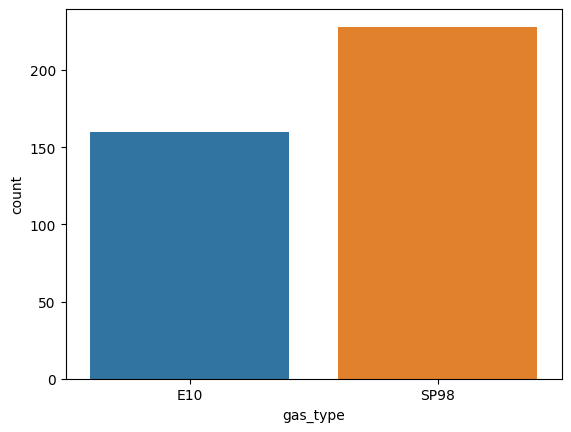

In [50]:
fig, ax = plt.subplots()
sns.countplot(x=df.gas_type)
plt.show()

This graph above shows that more trips used SP98 fuel type

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


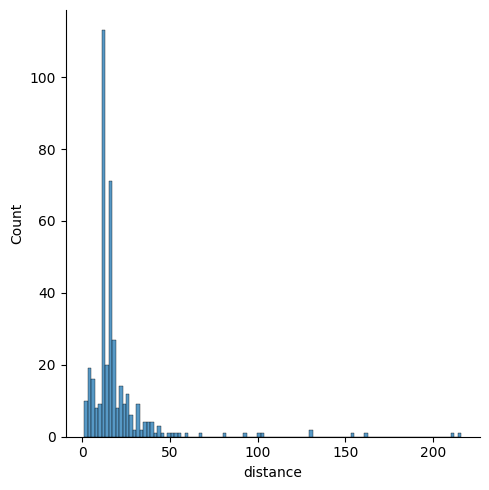

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


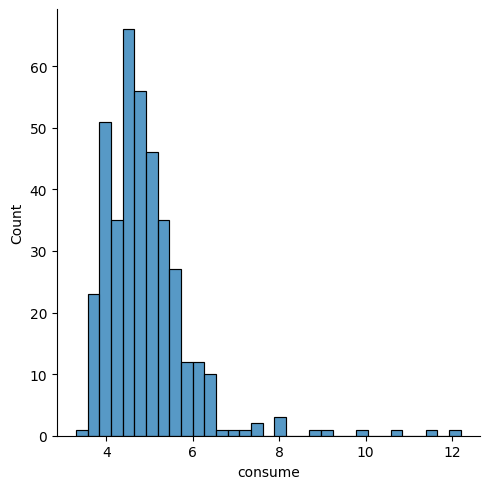

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


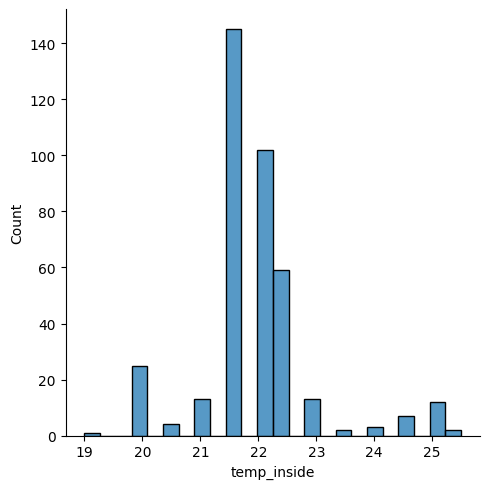

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


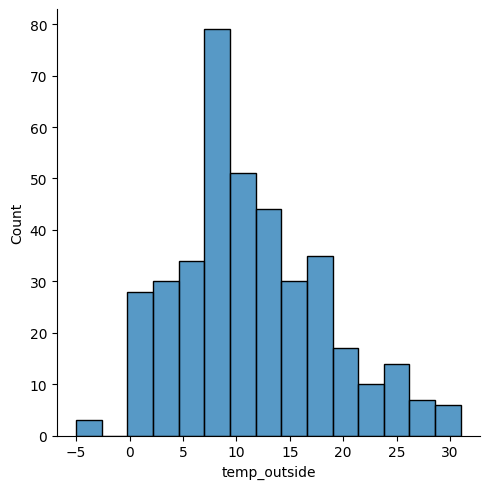

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


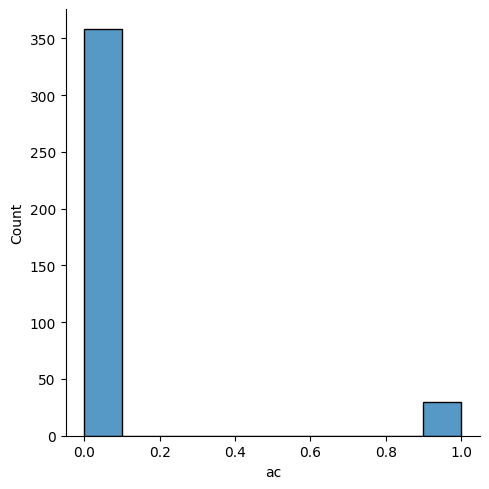

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


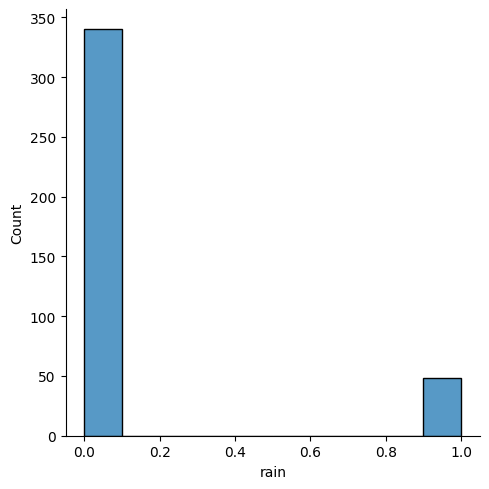

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


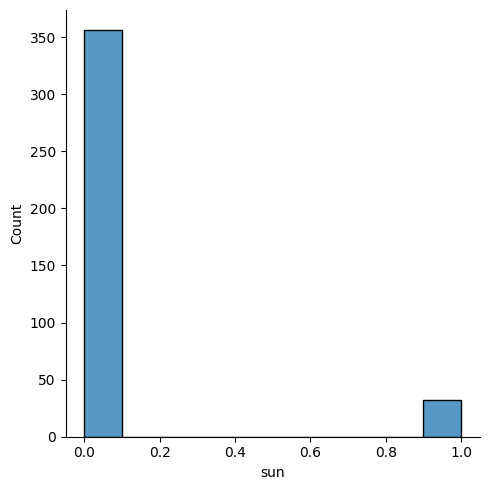

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


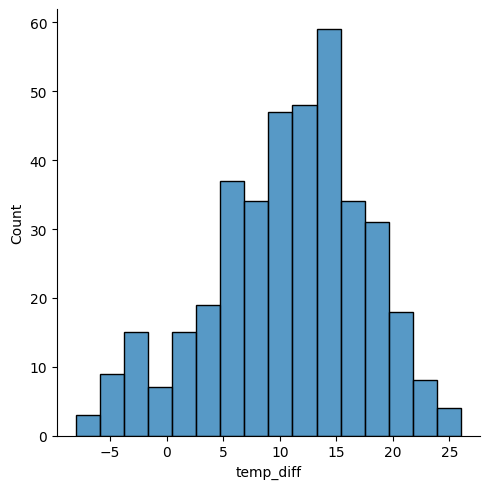

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


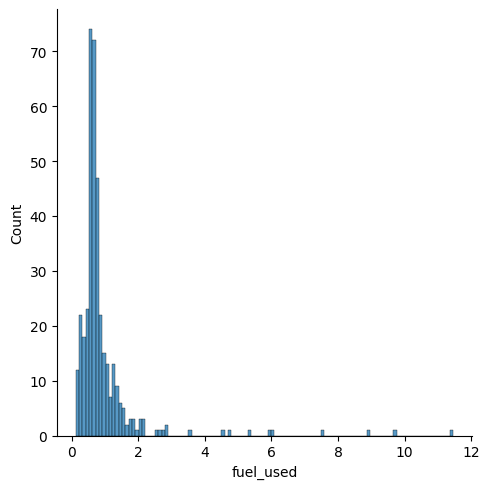

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


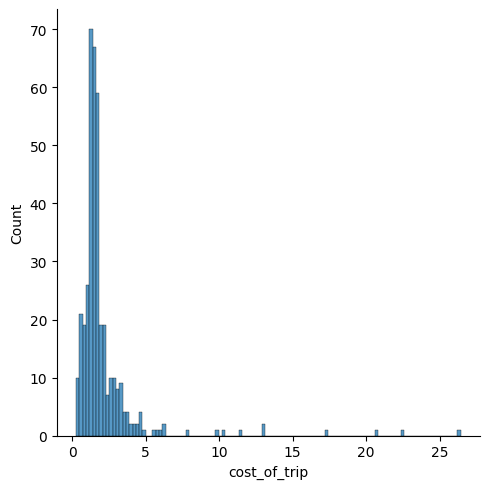

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


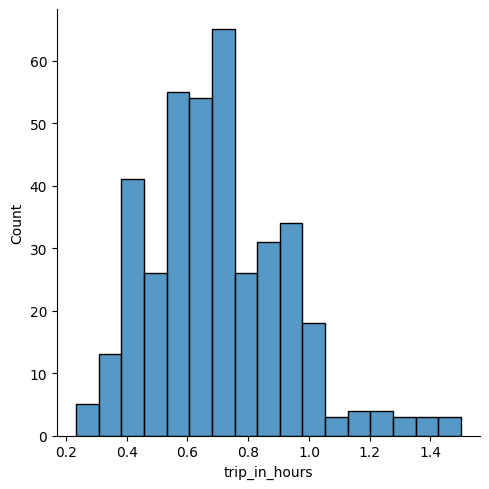

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


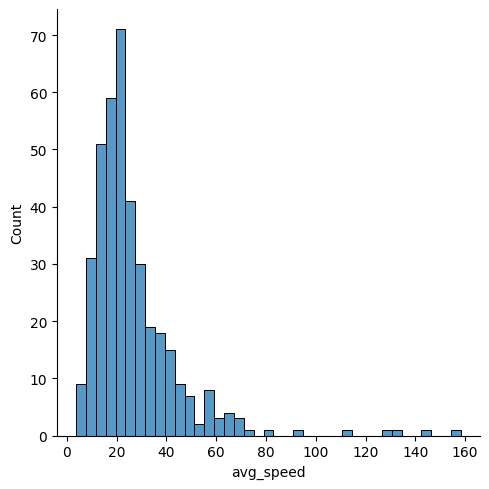

In [51]:
for column in data_num:
    sns.displot(data_num[column])
    plt.show()

The above graphs show the distribuition of the numerical columns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

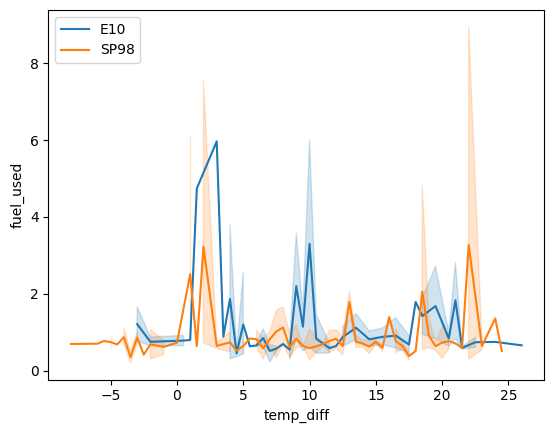

In [52]:
fig, ax = plt.subplots()
cole10 = df[df.gas_type == 'E10']
col98 = df[df.gas_type == 'SP98']

ax1 = sns.lineplot(data=cole10, x=cole10['temp_diff'], y=cole10['fuel_used'], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98['temp_diff'], y=col98['fuel_used'], label = 'SP98')
plt.legend(loc='upper left')
plt.show()

The graph above shows the fuel consumption of the different fuel used, depending on the difference in temperature between inside and outside

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

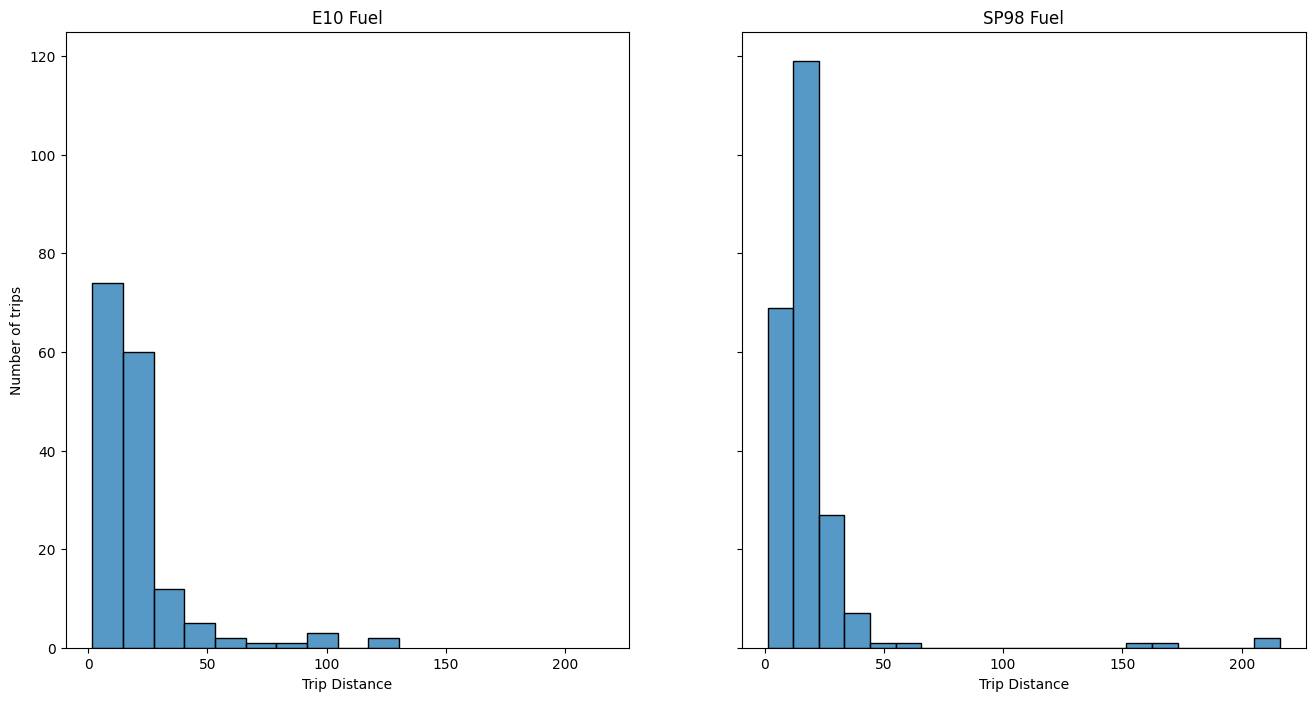

In [53]:
fig, axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = df[df.gas_type == 'E10']
col98 = df[df.gas_type == 'SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10['distance'], bins=10, label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel='Trip Distance', ylabel="Number of trips")

sns.histplot(ax=axes[1], data=col98, x=col98['distance'], bins=20, label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Trip Distance", ylabel='Number of trips')
plt.ylabel("Number of trips")

plt.show()

The graph above shows the number of trips at which distance they travel. We can see that SP98 fuel is used for longer distances.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

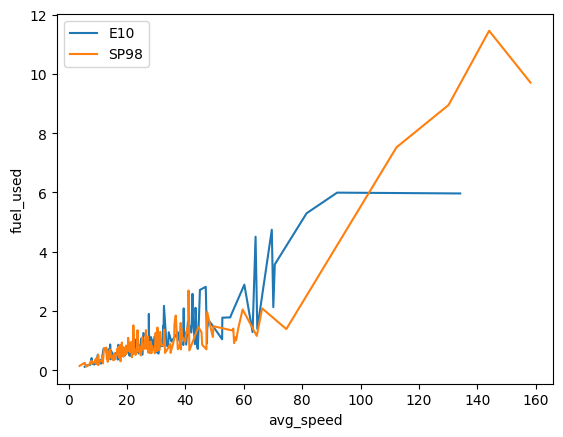

In [54]:
fig, ax = plt.subplots()
cole10 = df[df.gas_type == 'E10']
col98 = df[df.gas_type == 'SP98']

ax1 = sns.lineplot(data=cole10, x=cole10['avg_speed'], y=cole10['fuel_used'], label='E10')
ax2 = sns.lineplot(data=col98, x=col98['avg_speed'], y=col98['fuel_used'], label='SP98')
plt.legend(loc='upper left')
plt.show()

The graph above shows that after a average of 100km/h E10 consumption levels up, but the consumption of SP98 keeps growing

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

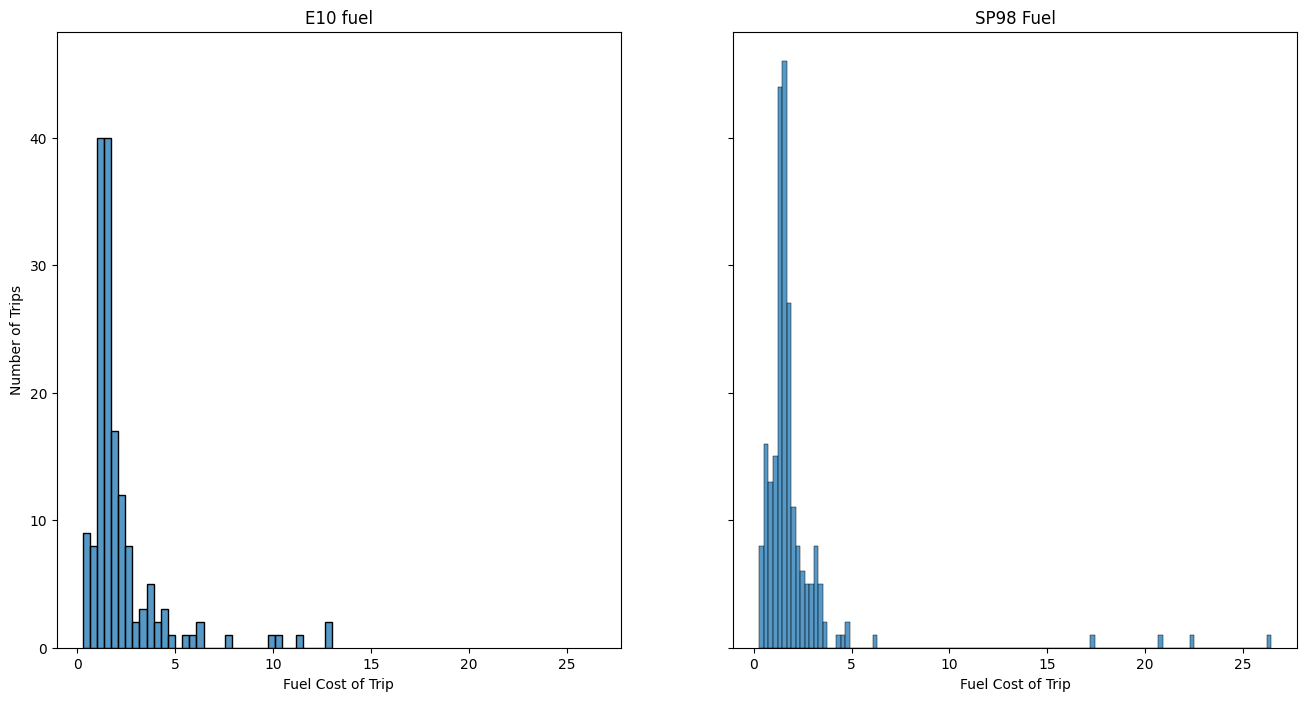

In [55]:
fig, axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
cole10 = df[df.gas_type=='E10']
col98 = df[df.gas_type=='SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10['cost_of_trip'], label ='E10').set(title='E10 fuel')
axes[0].set(xlabel='Fuel Cost of Trip', ylabel='Number of Trips')

sns.histplot(ax=axes[1], data=col98, x=col98['cost_of_trip'], label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel='Fuel Cost of Trip', ylabel='Number of Trips')
plt.ylabel('Number of Trips')

plt.show()

The graphs above show that the costs distribuition is similar for both of the fuel types, with SP98 having the higher costs (but also having the longest trips). So it would be good to test E10 in longer trips to be able to compare them.

In [56]:
display(df['cost_of_trip'].max())
display(df['cost_of_trip'].min())

26.446

0.26

## Conclusions and Insights

# Based on the data, I can make some suggestions:
- It seems like when traveling at higher speeds, most likely in highways during longer trips, the E10 fuel is more more economic. You can try to assign cars that use E10 whenever the average speed is most likely to be over 100 km/h
- There is no such a diferrence between the consume on this twoo types of fuel when the trip is short. That's why I would recommend to use E10 as much as possible, since the price is lower in comparisson with SP98.
- If the temperature inside and outside is between 0 and 10 degrees it may be better to use the SP98 fuel. But if the difference is extreme, over 20 degrees, it may be better to use E10 fuel

## Hypothesis testing

1- Null hypothesis: the consumption of the different fuels are the same

In [58]:
from scipy.stats import ttest_ind

In [59]:
stat, pval = ttest_ind(df[df.gas_type == 'E10'].fuel_used, df[df.gas_type == 'SP98'].fuel_used)
print('The p-value of the test is:', pval)
print('The stat value of the test is:', stat)

The p-value of the test is: 0.27679289437741406
The stat value of the test is: 1.089091767035112


The p-value is over 0.05, so we can accept the hypothesis that the two fuel types are consumed almost equally

2- Null hypothesis: the fuel types cost about the same per trip

In [60]:
stat, pval = ttest_ind(df[df.gas_type == 'E10'].cost_of_trip, df[df.gas_type == 'SP98'].cost_of_trip)
print('The p-value of the test is:', pval)
print('The stat value of the test is:', stat)

The p-value of the test is: 0.5732920111228088
The stat value of the test is: 0.5636906471263579


The p-value is again over 0.05, so we can accept the hypothesis that the two fuel types cost about the same for each trip

There is a big discrepancy between the current price of each fuel and the historical prices. The price of SP98 has been significantly higher than of E10. And this would have a big impact in our hypothesis depending on the price of each fuel.

# Regression model

In [70]:
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [63]:
df

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,3.035,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,1.093,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,1.335,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,1.091,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.805,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,6.5,0.5920,1.367,0.650000,24.615385
384,16.1,4.3,25.0,31,SP98,1,0,0,-6.0,0.6923,1.599,0.633333,25.421053
385,16.0,3.8,25.0,19,SP98,0,0,0,6.0,0.6080,1.404,0.750000,21.333333
386,15.4,4.6,25.0,31,SP98,1,0,0,-6.0,0.7084,1.636,0.700000,22.000000


In [65]:
correlations = df.drop('gas_type', axis=1).corr()
correlations

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
distance,1.000000,-0.128967,0.077636,0.088175,-0.025738,-0.019791,0.081120,-0.080453,0.992101,0.990533,0.562299,0.884942
consume,-0.128967,1.000000,-0.154953,-0.320811,0.096591,0.248118,-0.170667,0.311697,-0.052188,-0.051897,-0.227866,-0.177825
temp_inside,0.077636,-0.154953,1.000000,0.357431,0.300407,-0.035199,0.241530,-0.224108,0.065359,0.064640,0.060039,0.069588
temp_outside,0.088175,-0.320811,0.357431,1.000000,0.167562,-0.186315,0.346903,-0.990287,0.037877,0.040618,0.015411,0.107179
ac,-0.025738,0.096591,0.300407,0.167562,1.000000,0.242915,0.088598,-0.130129,-0.018700,-0.017087,-0.035408,-0.009260
rain,-0.019791,0.248118,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.189179,0.009125,0.011916,0.009489,-0.027300
sun,0.081120,-0.170667,0.241530,0.346903,0.088598,-0.112650,1.000000,-0.326036,0.064247,0.065956,0.081618,0.058150
temp_diff,-0.080453,0.311697,-0.224108,-0.990287,-0.130129,0.189179,-0.326036,1.000000,-0.029795,-0.032762,-0.007143,-0.101481
fuel_used,0.992101,-0.052188,0.065359,0.037877,-0.018700,0.009125,0.064247,-0.029795,1.000000,0.999236,0.551847,0.868658
cost_of_trip,0.990533,-0.051897,0.064640,0.040618,-0.017087,0.011916,0.065956,-0.032762,0.999236,1.000000,0.545649,0.866526


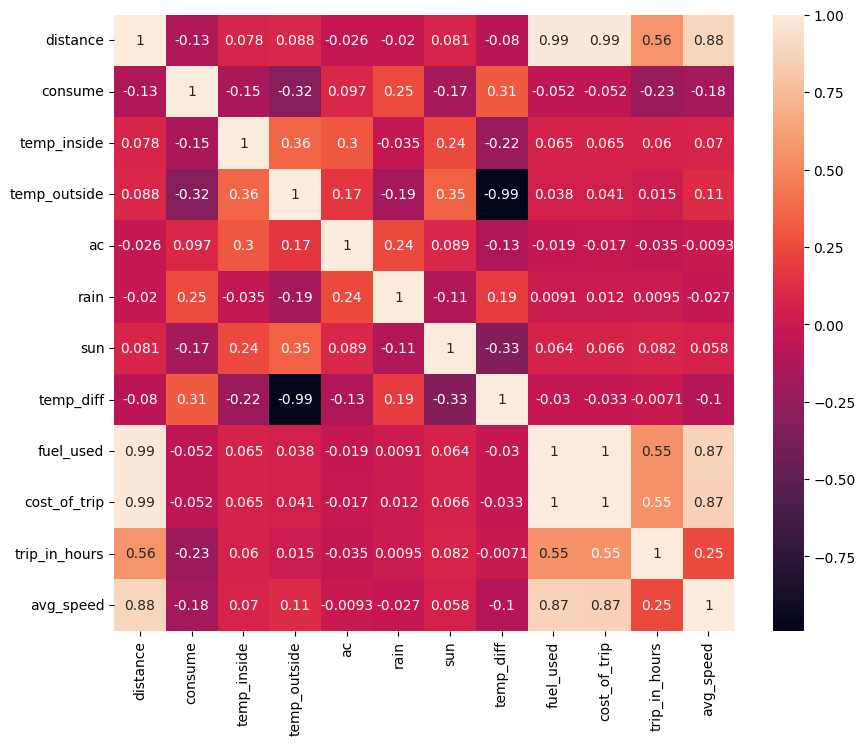

In [66]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

Because of the multi-collineatiry between the columns created before, I will drop them.

In [68]:
cols_to_drop = ['temp_diff', 'cost_of_trip', 'fuel_used', 'avg_speed']
df=df.drop(cols_to_drop, axis=1)
df

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,trip_in_hours
0,28.0,5.0,21.5,12,E10,0,0,0,0.433333
1,12.0,4.2,21.5,13,E10,0,0,0,0.500000
2,11.2,5.5,21.5,15,E10,0,0,0,0.633333
3,12.9,3.9,21.5,14,E10,0,0,0,0.600000
4,18.5,4.5,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,0.650000
384,16.1,4.3,25.0,31,SP98,1,0,0,0.633333
385,16.0,3.8,25.0,19,SP98,0,0,0,0.750000
386,15.4,4.6,25.0,31,SP98,1,0,0,0.700000


Splitting into X-features and y-target. We are trying to predict the amount of fuel consumed

In [69]:
X = df.drop('consume', axis=1)
y = df['consume']
X

,distance,temp_inside,temp_outside,gas_type,ac,rain,sun,trip_in_hours
0,28.0,21.5,12,E10,0,0,0,0.433333
1,12.0,21.5,13,E10,0,0,0,0.500000
2,11.2,21.5,15,E10,0,0,0,0.633333
3,12.9,21.5,14,E10,0,0,0,0.600000
4,18.5,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...
383,16.0,24.5,18,SP98,0,0,0,0.650000
384,16.1,25.0,31,SP98,1,0,0,0.633333
385,16.0,25.0,19,SP98,0,0,0,0.750000
386,15.4,25.0,31,SP98,1,0,0,0.700000


Train-test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:', X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (310, 8)
y_train shape is: (310,)
X_test shape is: (78, 8)
y_test shape is: (78,)


In [72]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

Now we have to transform and scale out numerical data

In [73]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

(310, 7)


,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
158,0.095079,0.384615,0.388889,0.0,1.0,0.0,0.410959
162,0.246058,0.384615,0.194444,0.0,0.0,0.0,0.780822
283,0.145246,0.461538,0.583333,0.0,0.0,0.0,0.493151
79,0.158146,0.153846,0.250000,0.0,0.0,0.0,0.191781
336,0.065456,0.384615,0.722222,0.0,0.0,0.0,0.493151


In [74]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(78, 7)


,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
373,0.064978,0.769231,0.888889,1.0,0.0,0.0,0.027397
269,0.065456,0.461538,0.527778,0.0,0.0,0.0,0.493151
109,0.071190,0.307692,0.333333,0.0,0.0,0.0,0.575342
27,0.079790,0.384615,0.222222,0.0,0.0,0.0,0.191781
242,0.035834,0.538462,0.361111,0.0,1.0,0.0,0.260274


Now we have to encode the categorical column

In [75]:
X_train_cat['gas_type'] = np.where(X_train_cat['gas_type']=='E10', 1,0)
X_train_cat['gas_type']

158    1
162    1
283    0
79     0
336    1
      ..
230    0
16     1
74     0
176    1
338    1
Name: gas_type, Length: 310, dtype: int64

In [76]:
X_test_cat['gas_type'] = np.where(X_test_cat['gas_type']=='E10', 1,0)
X_test_cat['gas_type']

373    0
269    1
109    0
27     1
242    1
      ..
125    0
310    0
54     0
240    1
273    1
Name: gas_type, Length: 78, dtype: int64

Merging the numerical and categorical back together

In [77]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_train
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_test

,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours,gas_type
373,15.3,24.0,27,1,0,0,0.266667,0
269,15.4,22.0,14,0,0,0,0.833333,1
109,16.6,21.0,7,0,0,0,0.933333,0
27,18.4,21.5,3,0,0,0,0.466667,1
242,9.2,22.5,8,0,1,0,0.550000,1
...,...,...,...,...,...,...,...,...
125,12.2,23.0,0,0,1,0,0.950000,0
310,18.7,22.0,13,0,0,0,1.000000,0
54,6.1,21.5,8,0,0,0,0.466667,0
240,12.4,22.5,11,0,0,1,0.916667,1


First try at Linear Regression

In [78]:
lm=LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm=lm.predict(X_test)

In [79]:
print('The R2 score is:', lm.score(X_test, y_test))

The R2 score is: 0.11099927434619594


Looking at other regressor models

In [80]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test,y_test)}")

In [81]:
model_list = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]
models_automation(model_list, X_train, y_train)

LinearRegression: Train -> 0.23638483313493508, Test -> 0.11099927434619594
KNeighborsRegressor: Train -> 0.640229770640767, Test -> 0.527688005163035
DecisionTreeRegressor: Train -> 0.9999195353712774, Test -> 0.4600940409969576


The KNeighbors regressor has the best score for the test split, so for new data this is the best option to predict the consume of the fuel